# The K-profile parameterization in `OceanTurb.jl`

Here we demonstrate how to set up a `Model` in `OceanTurb.jl`, set initial conditions and boundary conditions, and iterate the model forward.

In [1]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb, PyPlot, PyPlotPlus

import PyPlot: plot

plot(f::Field, args...; kwargs...) = plot(data(f), nodes(f), args...; kwargs...)
plot(op::Function, f::Field, args...; kwargs...) = plot(op.(data(f)), nodes(f), args...; kwargs...)

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.0/OceanTurb/9iboO.ji for OceanTurb [d848d694-35fd-11e9-1c91-9995598ac29e]
└ @ Base loading.jl:1187


plot (generic function with 3 methods)

In [9]:
# First, we define the model.
parameters = KPP.Parameters(K₀=1e-6)
model = KPP.Model(N=150, L=150.0, parameters=parameters)

# Initial condition
γ = 0.01
T₀(z) = 20 + γ*z

# Set T to the function T0(z)
model.solution.T = T₀

temperature_flux = 3.6e-8
model.bcs.T.top = FluxBoundaryCondition(temperature_flux)
model.bcs.T.bottom = GradientBoundaryCondition(γ)
KPP.update_state!(model)

@show model.state.h KPP.isforced(model)

(model.state).h = 1.0
KPP.isforced(model) = true


true

# A constant flux boundary condition

Next, we demonstrate how to set a constant flux boundary condition in `OceanTurb.KPP`.

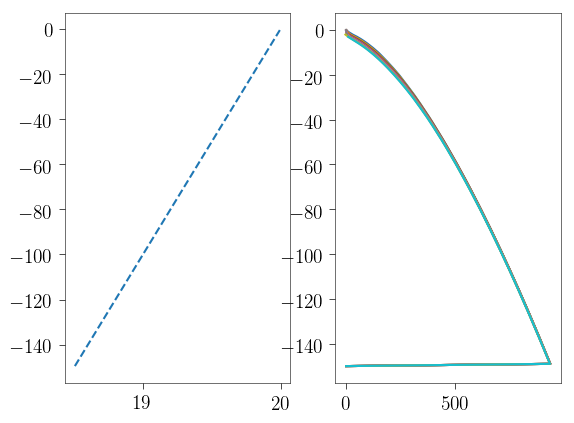

In [15]:
model.solution.T = T₀

U, V, T, S = model.solution

# Initialize plotting
fig, axs = subplots(ncols=2)

sca(get(axs, 0))
plot(T, "--", label="initial condition")

dt = 1000.0

Ri = FaceField(model.grid)

for i = 1:10
    iterate!(model, dt, 100)
    
    for i in interior(Ri)
        @inbounds Ri[i] = KPP.bulk_richardson_number(model, i)
    end
    
    sca(get(axs, 1))
    plot(Ri, "-")
end